# Lab 8: Define and Solve an ML Problem of Your Choosing

In [40]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [41]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename)# YOUR CODE HERE

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

<Double click this Markdown cell to make it editable, and record your answers here.>
1. censusDta.csv
2. income_binary, whether a person earns >50K or <=50K per year
3. It's supervised learning. The problem type is classifiaction. It's binary classification
4. My features are age, workclass,education, marital-status, occupation, relationship, race, sex_selfID, capital-gain, capital-loss, hours-per-week, native-country. fnlwgt and education-num are not helpful and can be dropped. 
5. A model predicting income level can help bussiness and organizations. For instance, segment customers based on financial potential, tailor services or products by income group, identify individuals who may benifit from job training or education programs, improve hiring decisions and workforce planning, support goverement or non- profit resource allocation.


## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

Shape of the dataset: (32539, 13)

Summary statistics:
                 age workclass education      marital-status      occupation  \
count   32539.000000     32539     32539               32539           32539   
unique           NaN         9        16                   7              15   
top              NaN   Private   HS-grad  Married-civ-spouse  Prof-specialty   
freq             NaN     22675     10495               14970            4137   
mean       38.584406       NaN       NaN                 NaN             NaN   
std        13.611868       NaN       NaN                 NaN             NaN   
min        17.000000       NaN       NaN                 NaN             NaN   
25%        28.000000       NaN       NaN                 NaN             NaN   
50%        37.000000       NaN       NaN                 NaN             NaN   
75%        48.000000       NaN       NaN                 NaN             NaN   
max        90.000000       NaN       NaN                 NaN     

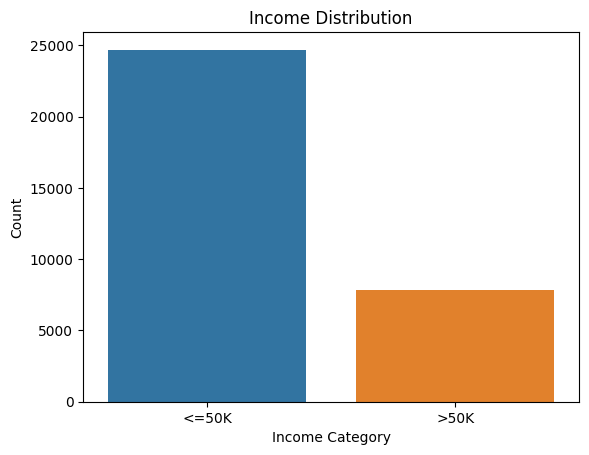

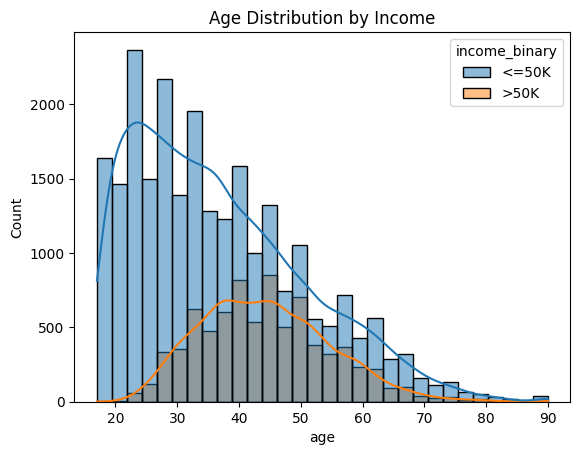

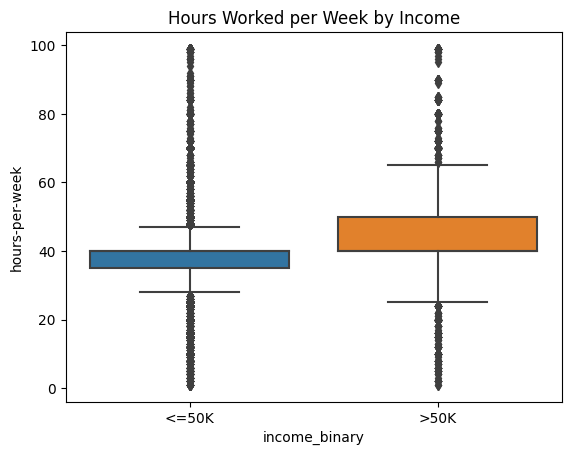

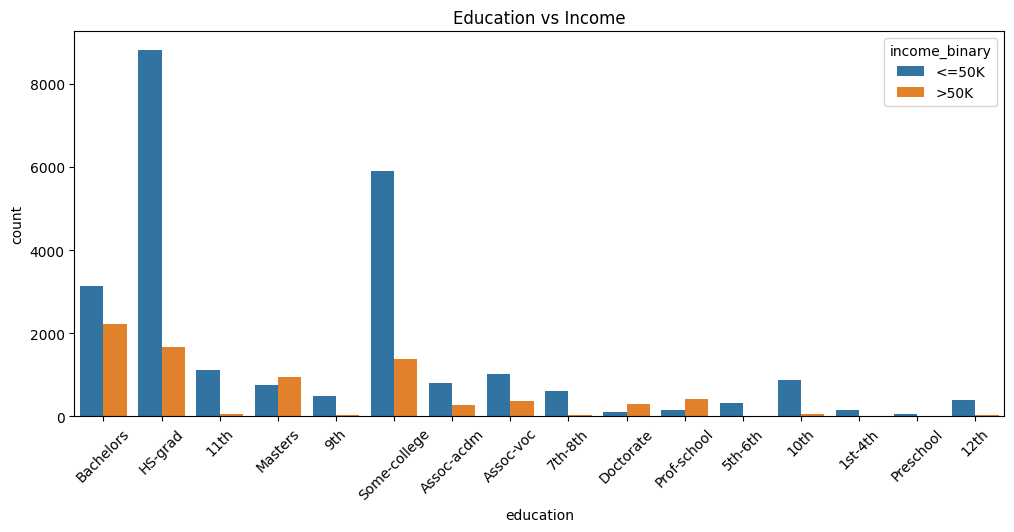

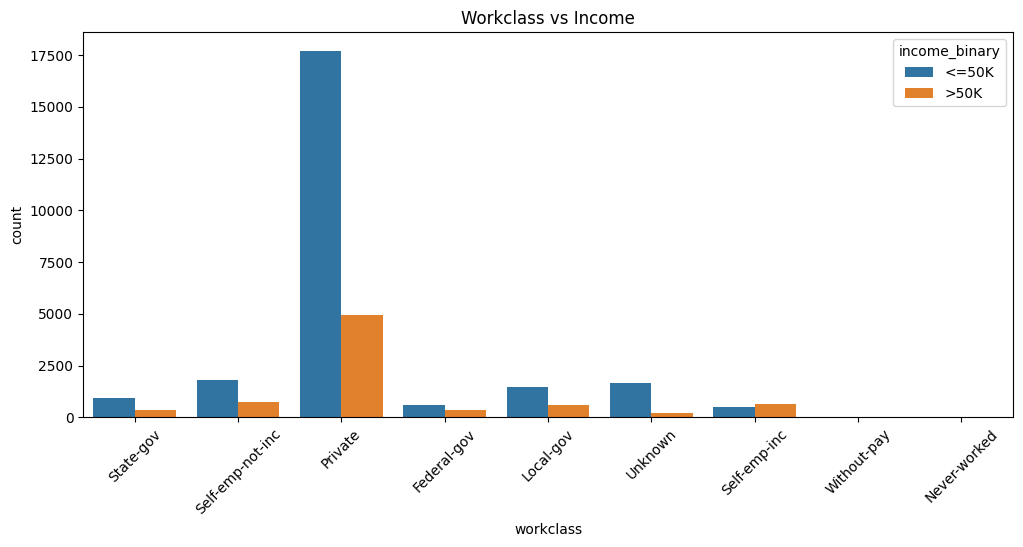

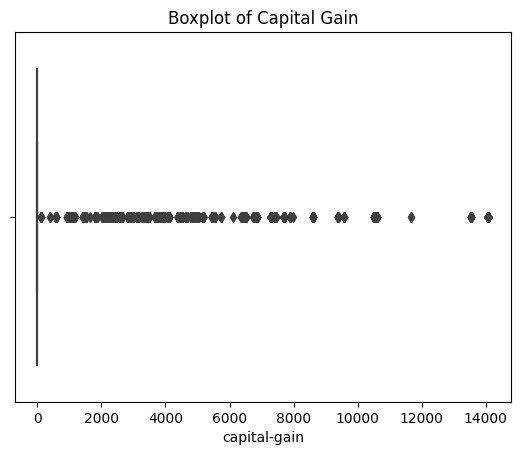

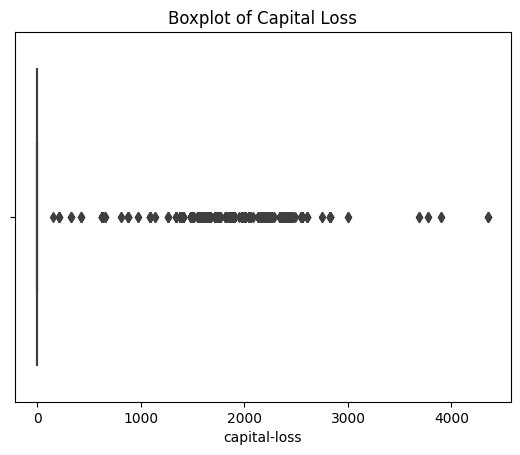

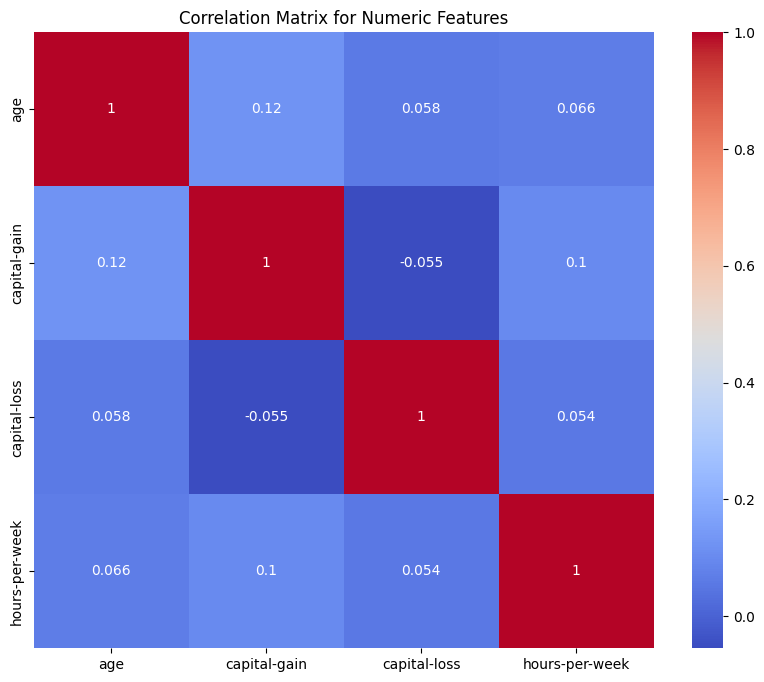

KeyError: "['fnlwgt', 'education-num'] not found in axis"

In [43]:
# YOUR CODE HERE

print("Shape of the dataset:", df.shape)

print("\nSummary statistics:")
print(df.describe(include='all'))

print("\nData types and non-null counts:")
df.info()

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

print("\nIncome distribution (class balance):")
print(df['income_binary'].value_counts(normalize=True))


print("\nUnique values:")
print("Workclass:", df['workclass'].unique())
print("Education:", df['education'].unique())
print("Occupation:", df['occupation'].unique())

# Plot income distribution
sns.countplot(x='income_binary', data=df)
plt.title('Income Distribution')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.show()

# Age distribution by income
sns.histplot(data=df, x='age', hue='income_binary', kde=True, bins=30)
plt.title("Age Distribution by Income")
plt.show()

# Hours-per-week vs income
sns.boxplot(x='income_binary', y='hours-per-week', data=df)
plt.title("Hours Worked per Week by Income")
plt.show()

# Education level vs. income
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='education', hue='income_binary')
plt.xticks(rotation=45)
plt.title("Education vs Income")
plt.show()

# Workclass vs. income
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='workclass', hue='income_binary')
plt.xticks(rotation=45)
plt.title("Workclass vs Income")
plt.show()

# Boxplots for capital-gain and capital-loss to detect outliers
sns.boxplot(data=df, x='capital-gain')
plt.title('Boxplot of Capital Gain')
plt.show()

sns.boxplot(data=df, x='capital-loss')
plt.title('Boxplot of Capital Loss')
plt.show()

# Correlation matrix for numeric features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Features')
plt.show()


# Drop duplicates
df = df.drop_duplicates()

# Drop fnlwgt and education-num 
df = df.drop(columns=['fnlwgt', 'education-num'])

# Fill missing categorical values with 'Unknown'
for col in ['workclass', 'occupation', 'native-country']:
    df[col] = df[col].fillna('Unknown')

# Fill missing numeric values with median
df['age'] = df['age'].fillna(df['age'].median())
df['hours-per-week'] = df['hours-per-week'].fillna(df['hours-per-week'].median())


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 


1. Yes. After inspecting the data, I kept:
age, workclass, education, marital-status, occupation, relationship, race, sex_selfID, capital-gain, capital-loss, hours-per-week, native-country.
I removed:
fnlwgt and education-num.

2. Drop duplicates

Fill missing categorical values with 'Unknown'

Fill missing numeric values with the median

One-hot encode categorical features

Scale numeric features

3. I will start with Logistic Regression as a baseline because it’s simple, fast, and provides interpretable results. Then I will test Random Forest to improve performance, as it can model complex patterns and interactions between features better than linear models.

   
4. I will split the data into training and testing sets to evaluate model generalization on unseen data. Using cross-validation on the training set, I will tune hyperparameters and avoid overfitting.

I will evaluate the model with the following metrics:

Accuracy: measures overall correct predictions.

Precision: shows how many predicted high-income cases are actually correct, helping reduce false positives.

Recall (Sensitivity): measures how many actual high-income cases are correctly identified, important for minimizing false negatives.

Specificity: measures how well the model identifies low-income individuals correctly (true negatives).

ROC-AUC: summarizes the model’s ability to distinguish between classes across all thresholds, providing a balanced performance metric.

By analyzing these metrics, I can understand different aspects of model performance and make informed decisions on model improvements. I will iteratively tune hyperparameters and select features to maximize these scores. The final model will be chosen based on the best performance on the test set to ensure good generalization.



## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [44]:
# YOUR CODE HERE

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc



<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [ ]:
# YOUR CODE HERE

X = df.drop('income_binary', axis=1)
y = df['income_binary'].apply(lambda x: 1 if x == '>50K' else 0)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Identify column types
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()


preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])


rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(rf_pipeline, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

roc_auc = roc_auc_score(y_test, y_proba)

# Print metrics
print("Tuned Random Forest Evaluation Metrics:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Fitting 3 folds for each of 24 candidates, totalling 72 fits



I used a Random Forest model to predict whether a person earns more than $50K a year. After testing different settings (like how many trees to use, and how deep the trees can grow), I found the best combination of parameters that gave me strong results.

Best Results:
Accuracy: 85.35% – This means about 85 out of 100 predictions were correct.

Precision: 75.10% – When the model said someone earns more than $50K, it was right 75% of the time.

Recall: 61.75% – The model was able to correctly find about 62% of the people who really do earn more than $50K.

Specificity: 93.19% – It correctly identified most of the people who earn less than $50K.

ROC-AUC: 0.91 – This is a strong score showing that the model is good at separating high- and low-income earners.

Confusion Matrix:
The model correctly predicted that 4067 people earn ≤50K

The model correctly predicted that 896 people earn >50K

The model incorrectly predicted that 297 people earn >50K (but they actually earn ≤50K)

The model incorrectly predicted that 555 people earn ≤50K (but they actually earn >50K)

In simple terms, the model works well overall. It makes good predictions and can tell the difference between high and low income earners. 

